In [1]:
from sympy import symbols
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

#Mrem formula
def Mrem(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    MSum3 = mass1 + mass2
    n3 = (mass1 * mass2) / MSum3 
    dm3 = (mass1 - mass2) / MSum3
    Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
    return Mrem_Mass

#set up array of masses
m1_array= []
for i in np.linspace(1,100,100):
    m1_array += [i]
    
m2_array= []
for i in np.linspace(1,1,1):
    m2_array += [i]
    
#create array of solution set
xcoor = []
ycoor = []
for i in m1_array:
    for j in m2_array:
        if i > j:
            xcoor += [i]
            ycoor += [j]



Mrem_sol = Mrem(np.array(xcoor),np.array(ycoor))

xy = (xcoor,ycoor,Mrem_sol)


In [2]:
choice = np.logical_and(np.greater(Mrem_sol, 45), np.less(Mrem_sol, 110)) 
Mrem_fit = np.extract(choice, Mrem_sol)
df = pd.DataFrame(xy).T 
df.to_excel(excel_writer = "/Users/Oscar/Documents/Research/Mass_Distribution.xlsx")

In [2]:
data_mass1 = pd.read_excel (r'/Users/Oscar/Documents/Research/Second_Generation.xlsx',sheet_name="Mass_1" , engine='openpyxl')
df1 = pd.DataFrame(data_mass1)
m1_1 = df1['m1_1']
m1_2 = df1['m1_2']
m1 = df1['m1']
m1_w = df1['m1_weight']

data_mass2 = pd.read_excel (r'/Users/Oscar/Documents/Research/Second_Generation.xlsx',sheet_name="Mass_2" , engine='openpyxl')
df2 = pd.DataFrame(data_mass2)
m2_1 = df2['m2_1']
m2_2 = df2['m2_2']
m2 = df2['m2']
m2_w = df2['m2_weight']

Text(0, 0.5, 'Mass 1_2 (M☉)')

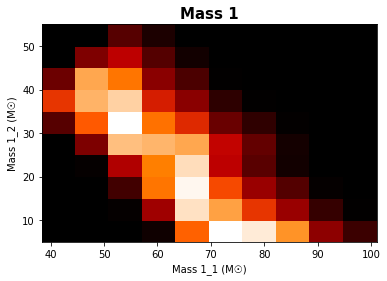

In [90]:
plot.hist2d(m1_1, m1_2, weights =m1_w, cmap=plot.cm.gist_heat)

plot.title('Mass 1', fontweight="bold", fontsize=15)
plot.xlabel('Mass 1_1 (M☉)')
plot.ylabel('Mass 1_2 (M☉)')

<AxesSubplot:xlabel='m1_1', ylabel='m1_2'>

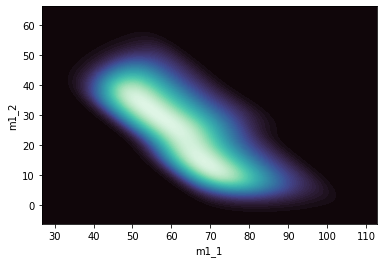

In [13]:
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot

sns.kdeplot(
    x=m1_1, y=m1_2,
    fill=True, thresh=0, levels=100, cmap="mako", weights = m1_w
)

Text(0, 0.5, 'Mass 2_2 (M☉)')

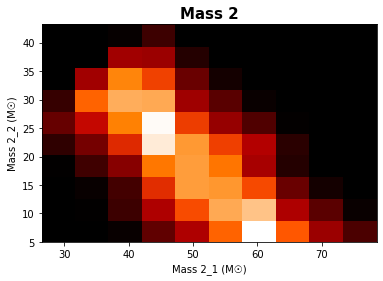

In [97]:
plot.hist2d(m2_1, m2_2, weights = m2_w, cmap=plot.cm.gist_heat)

plot.title('Mass 2', fontweight="bold", fontsize=15)
plot.xlabel('Mass 2_1 (M☉)')
plot.ylabel('Mass 2_2 (M☉)')

<AxesSubplot:xlabel='m2_1', ylabel='m2_2'>

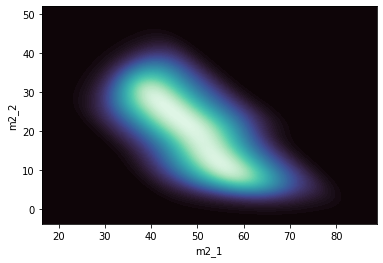

In [10]:
sns.kdeplot(
    x=m2_1, y=m2_2,
    fill=True, thresh=0, levels=150, cmap="mako", weights = m2_w
)

Text(0.5, 0, '(M☉)')

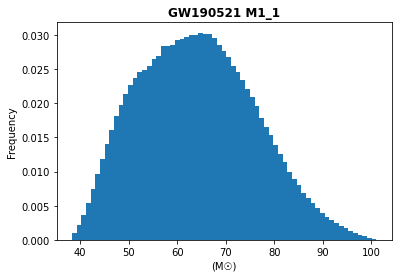

In [47]:
fig = m1_1.plot(kind="hist", bins = 65, weights=m1_w ,density =True)
plot.title('GW190521 M1_1', fontweight="bold", fontsize=12)
plot.xlabel('(M☉)')

Text(0.5, 0, '(M☉)')

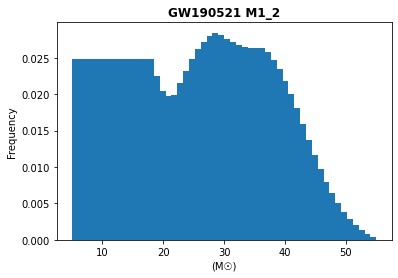

In [48]:
m1_2.plot(kind="hist", bins = 52, weights=m1_w ,density =True)
plot.title('GW190521 M1_2', fontweight="bold", fontsize=12)
plot.xlabel('(M☉)')

Text(0.5, 0, '(M☉)')

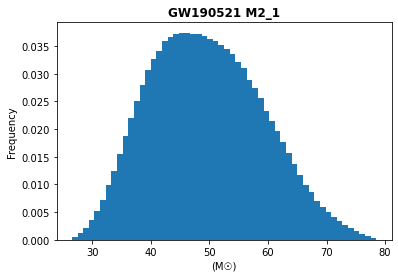

In [49]:
m2_1.plot(kind="hist", bins = 54, weights=m2_w ,density =True)
plot.title('GW190521 M2_1', fontweight="bold", fontsize=12)
plot.xlabel('(M☉)')

Text(0.5, 0, '(M☉)')

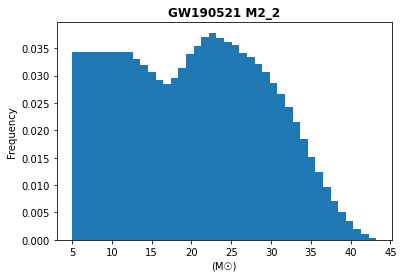

In [55]:
m2_2.plot(kind="hist", bins = 40, weights=m2_w ,density =True)
plot.title('GW190521 M2_2', fontweight="bold", fontsize=12)
plot.xlabel('(M☉)')